In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
df.shape

(205, 26)

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
x = df.drop(columns=['price'])
y = df['price']

In [7]:
# x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [8]:
ss = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state=42)
for train_index, test_index in ss.split(x,x['carbody']):
    x_train,x_test = x.iloc[train_index], x.iloc[test_index]
    y_train,y_test = y.iloc[train_index], y.iloc[test_index]

In [9]:
x_train.shape

(164, 25)

In [10]:
x_test.shape

(41, 25)

In [11]:
y_train.shape

(164,)

In [12]:
y_test.shape

(41,)

# Feature selection

In [13]:
def pos_correlation(dataset, thresold):
    corr_features = set()
    corr_mat = dataset.corr()
    for i in range (len(corr_mat.columns)):
        for j in range (i):
            if corr_mat.iloc[i,j] > thresold:
                col_names = corr_mat.columns[i]
                corr_features.add(col_names)
    return corr_features


In [14]:
pos_corr_features = pos_correlation(x_train,0.8)

In [15]:
def neg_correlation(dataset, thresold):
    corr_features = set()
    corr_mat = dataset.corr()
    for i in range (len(corr_mat.columns)):
        for j in range (i):
            if corr_mat.iloc[i,j] < thresold:
                col_names = corr_mat.columns[i]
                corr_features.add(col_names)
    return corr_features

In [16]:
neg_corr_features = neg_correlation(x_train,-0.7)

In [17]:
pos_corr_features

{'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'highwaympg',
 'horsepower'}

In [18]:
neg_corr_features

{'citympg', 'highwaympg'}

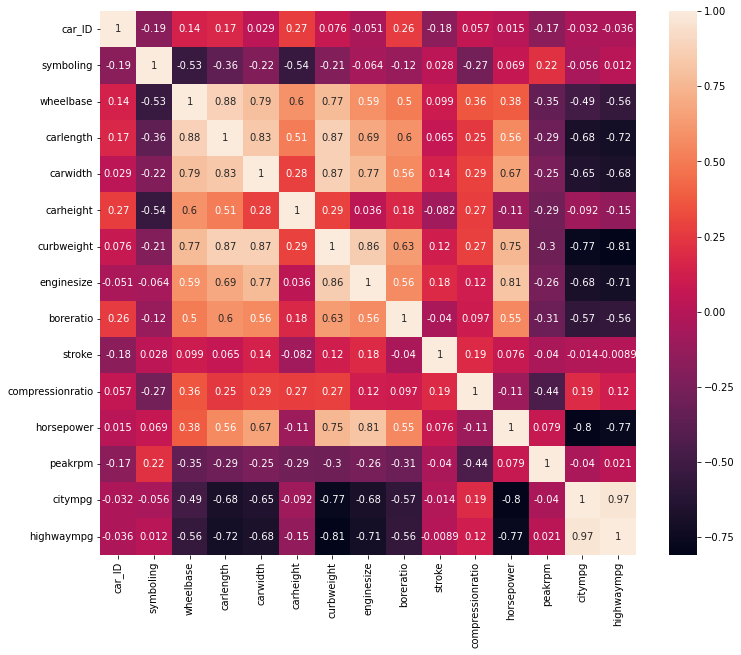

In [19]:
corr = x_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show()

In [20]:
df.corrwith(df['price'])

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
dtype: float64

In [21]:
x_train_sort = x_train.drop(columns=['symboling','enginelocation','car_ID','CarName','carlength','carwidth','curbweight','highwaympg','horsepower','citympg','fuelsystem','enginetype'])

In [22]:
x_test_sort = x_test.drop(columns=['symboling','enginelocation','car_ID','CarName','carlength','carwidth','curbweight','highwaympg','horsepower','citympg','fuelsystem','enginetype'])

In [23]:
x_train_sort.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carheight,cylindernumber,enginesize,boreratio,stroke,compressionratio,peakrpm
87,gas,turbo,four,sedan,fwd,96.3,51.6,four,110,3.17,3.46,7.5,5500
114,diesel,turbo,four,wagon,rwd,114.2,58.7,four,152,3.70,3.52,21.0,4150
108,diesel,turbo,four,sedan,rwd,107.9,56.7,four,152,3.70,3.52,21.0,4150
169,gas,std,two,hatchback,rwd,98.4,52.0,four,146,3.62,3.50,9.3,4800
140,gas,std,two,hatchback,4wd,93.3,55.7,four,108,3.62,2.64,8.7,4400


In [24]:
x_train_sort.describe()

,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,98.932317,53.777439,128.518293,3.341402,3.255579,9.842805,5123.170732
std,6.030545,2.446165,41.414776,0.271331,0.323355,3.582680,466.694099
min,86.600000,47.800000,70.000000,2.540000,2.070000,7.000000,4150.000000
25%,94.500000,52.000000,98.000000,3.150000,3.110000,8.500000,4800.000000
50%,97.000000,54.100000,120.000000,3.330000,3.290000,9.000000,5200.000000
75%,102.400000,55.500000,142.000000,3.590000,3.410000,9.400000,5500.000000
max,120.900000,59.800000,326.000000,3.940000,4.170000,23.000000,6600.000000


In [25]:
x_train_sort.shape

(164, 13)

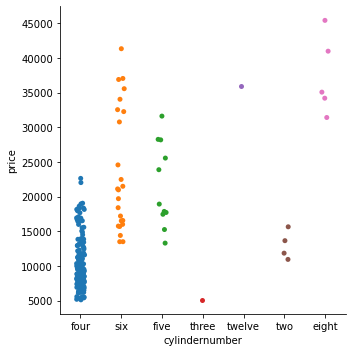

In [26]:
sns.catplot(x='cylindernumber',y='price',data=df)

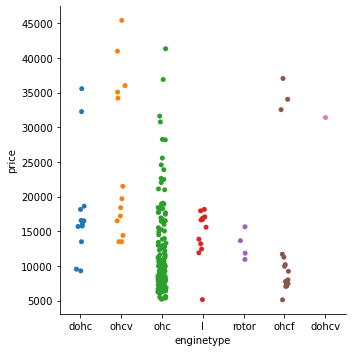

In [27]:
sns.catplot(x='enginetype',y='price',data=df)

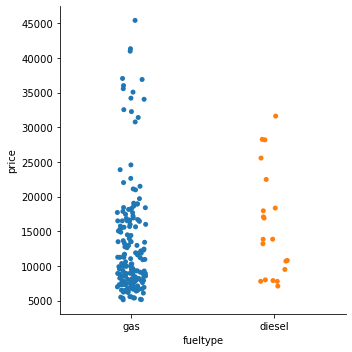

In [28]:
sns.catplot(x='fueltype',y='price',data=df)

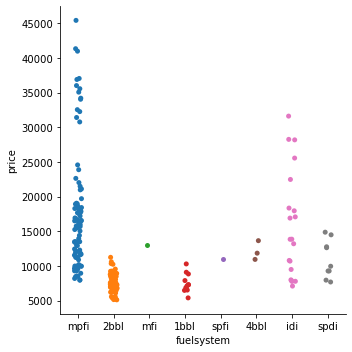

In [29]:
sns.catplot(x='fuelsystem',y='price',data=df)

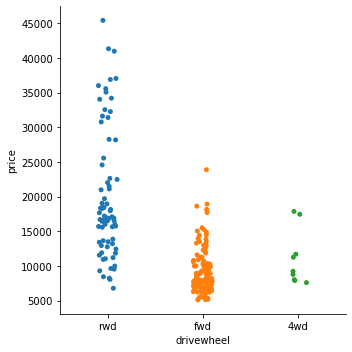

In [30]:
sns.catplot(x='drivewheel',y='price',data=df)

In [31]:
y_train

87      9279.0
114    17075.0
108    13200.0
169     9989.0
140     7603.0
        ...   
113    16695.0
186     8495.0
101    13499.0
133    12170.0
200    16845.0
Name: price, Length: 164, dtype: float64

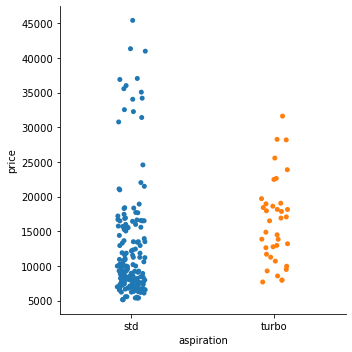

In [32]:
sns.catplot(x='aspiration',y='price',data=df)

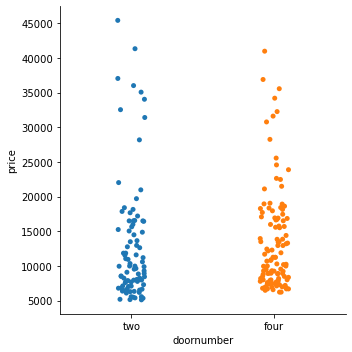

In [33]:
sns.catplot(x='doornumber',y='price',data=df)

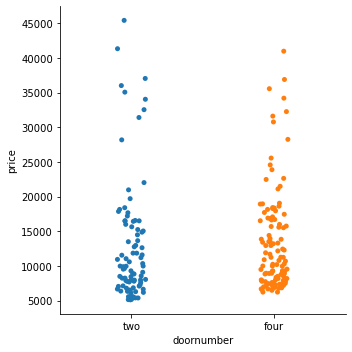

In [34]:
sns.catplot(x='doornumber',y='price',data=df)

In [35]:
x_train_sort.describe()

,wheelbase,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,98.932317,53.777439,128.518293,3.341402,3.255579,9.842805,5123.170732
std,6.030545,2.446165,41.414776,0.271331,0.323355,3.582680,466.694099
min,86.600000,47.800000,70.000000,2.540000,2.070000,7.000000,4150.000000
25%,94.500000,52.000000,98.000000,3.150000,3.110000,8.500000,4800.000000
50%,97.000000,54.100000,120.000000,3.330000,3.290000,9.000000,5200.000000
75%,102.400000,55.500000,142.000000,3.590000,3.410000,9.400000,5500.000000
max,120.900000,59.800000,326.000000,3.940000,4.170000,23.000000,6600.000000


In [36]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = x_train_sort.select_dtypes(include=numerics)

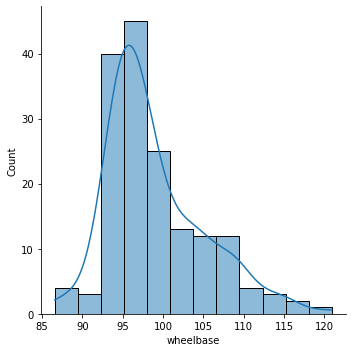

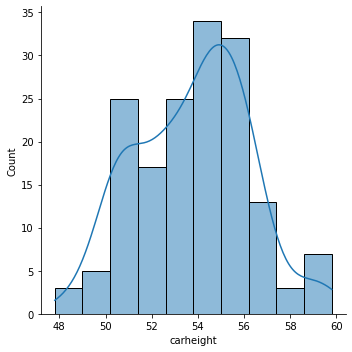

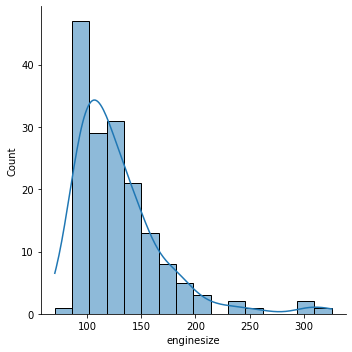

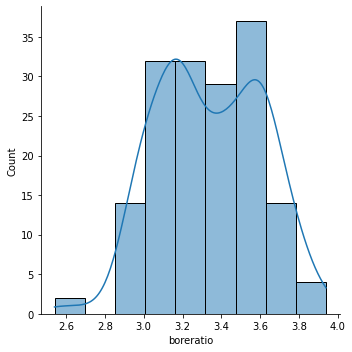

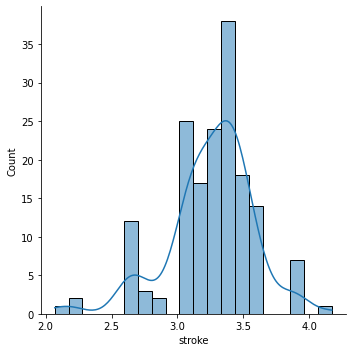

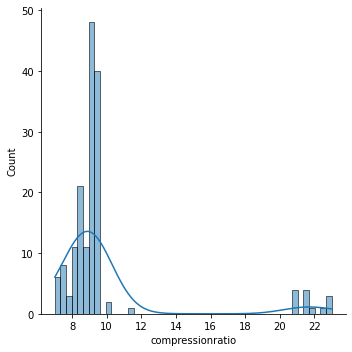

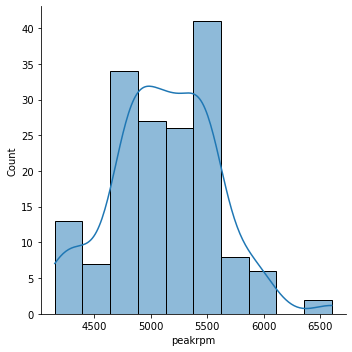

In [37]:
for cols in newdf.columns:
    sns.displot(newdf[cols],kde=True)

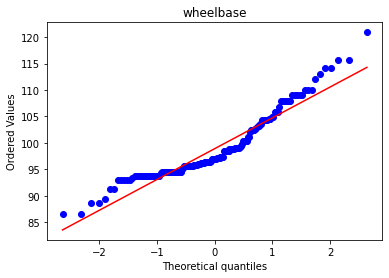

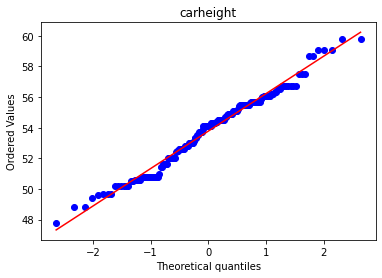

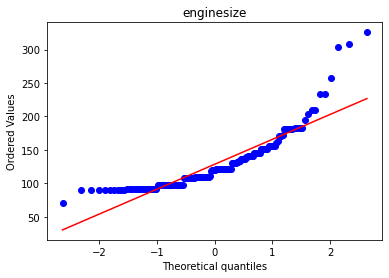

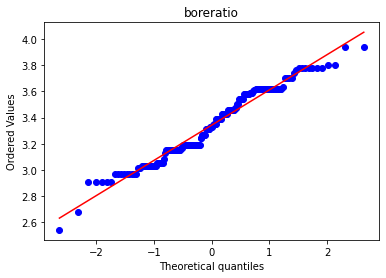

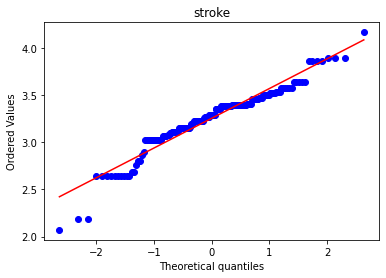

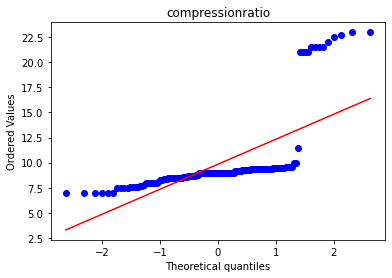

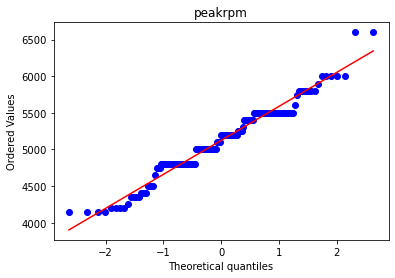

In [38]:
for cols in newdf.columns:
    stats.probplot(newdf[cols], dist='norm', plot=plt)
    plt.title(cols)
    plt.show()

In [39]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PowerTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer 

In [40]:
x_train_sort.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carheight,cylindernumber,enginesize,boreratio,stroke,compressionratio,peakrpm
87,gas,turbo,four,sedan,fwd,96.3,51.6,four,110,3.17,3.46,7.5,5500
114,diesel,turbo,four,wagon,rwd,114.2,58.7,four,152,3.70,3.52,21.0,4150
108,diesel,turbo,four,sedan,rwd,107.9,56.7,four,152,3.70,3.52,21.0,4150
169,gas,std,two,hatchback,rwd,98.4,52.0,four,146,3.62,3.50,9.3,4800
140,gas,std,two,hatchback,4wd,93.3,55.7,four,108,3.62,2.64,8.7,4400


In [41]:
transformer = ColumnTransformer(transformers=[('scaler', MinMaxScaler(), ['enginesize','peakrpm']),
                                ('OrdEnc1',OrdinalEncoder(categories=[['three','four','two','five','six','twelve','eight']]),['cylindernumber']), 
                                 ('OrdEnc2',OrdinalEncoder(categories=[['std','turbo']]),['aspiration']),
                                ('OHE',OneHotEncoder(drop='first', sparse=False),['carbody','fueltype','drivewheel','doornumber']),
                                ('Pt',PowerTransformer(),['wheelbase','enginesize','compressionratio'])], remainder='passthrough')

In [42]:
x_train_transformed = transformer.fit_transform(x_train_sort)
x_test_transformed = transformer.fit_transform(x_test_sort)

C:\Users\Anind\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [43]:
x_train_sort.shape

(164, 13)

In [44]:
x_train_transformed.shape

(164, 18)

In [45]:
x_train_sort.iloc[1,:]

fueltype            diesel
aspiration           turbo
doornumber            four
carbody              wagon
drivewheel             rwd
wheelbase            114.2
carheight             58.7
cylindernumber        four
enginesize             152
boreratio              3.7
stroke                3.52
compressionratio      21.0
peakrpm               4150
Name: 114, dtype: object

In [46]:
x_train_transformed[1]

array([ 0.3203125 ,  0.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  2.0112643 ,  0.92231905,  2.29780565,
       58.7       ,  3.7       ,  3.52      ])

In [47]:
x_train_dummy = pd.get_dummies(x_train_sort, columns=['carbody','fueltype','drivewheel','doornumber'], drop_first=True)
x_test_dummy = pd.get_dummies(x_test_sort, columns=['carbody','fueltype','drivewheel','doornumber'], drop_first=True)

In [48]:
x_train_transformed.shape

(164, 18)

In [49]:
x_test_transformed.shape

(41, 18)

In [50]:
x_train_sort.shape

(164, 13)

In [51]:
x_test_sort.shape

(41, 13)

In [52]:
x_test_transformed[1]

array([ 0.14720812,  0.72972973,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  0.        ,  0.        , -0.73269451, -0.07896498,
       50.8       ,  2.97      ,  3.23      ])

In [53]:
x_test_sort.iloc[1,:]

fueltype              gas
aspiration            std
doornumber           four
carbody             sedan
drivewheel            fwd
wheelbase            93.7
carheight            50.8
cylindernumber       four
enginesize             90
boreratio            2.97
stroke               3.23
compressionratio      9.4
peakrpm              5500
Name: 121, dtype: object

In [54]:
x_test_dummy.iloc[1,:]

aspiration            std
wheelbase            93.7
carheight            50.8
cylindernumber       four
enginesize             90
boreratio            2.97
stroke               3.23
compressionratio      9.4
peakrpm              5500
carbody_hardtop         0
carbody_hatchback       0
carbody_sedan           1
carbody_wagon           0
fueltype_gas            1
drivewheel_fwd          1
drivewheel_rwd          0
doornumber_two          0
Name: 121, dtype: object

In [55]:
x_train_dummy.iloc[1,:]

aspiration           turbo
wheelbase            114.2
carheight             58.7
cylindernumber        four
enginesize             152
boreratio              3.7
stroke                3.52
compressionratio      21.0
peakrpm               4150
carbody_hardtop          0
carbody_hatchback        0
carbody_sedan            0
carbody_wagon            1
fueltype_gas             0
drivewheel_fwd           0
drivewheel_rwd           1
doornumber_two           0
Name: 114, dtype: object

In [56]:
x_train_transformed[1][0]

0.3203125

In [57]:
dframe = pd.DataFrame(x_train_transformed)

In [58]:
dframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.156250,0.551020,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-0.336107,-0.318953,-1.742741,51.6,3.17,3.46
1,0.320312,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.011264,0.922319,2.297806,58.7,3.70,3.52
2,0.320312,0.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.434234,0.922319,2.297806,56.7,3.70,3.52
3,0.296875,0.265306,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.079175,0.796462,0.306799,52.0,3.62,3.50
4,0.148438,0.102041,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.030131,-0.407536,-0.193125,55.7,3.62,2.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.195312,0.346939,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.011264,0.071678,-0.499740,56.7,3.46,2.19
160,0.152344,0.448980,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-0.131780,-0.362759,0.073674,55.7,3.19,3.40
161,0.433594,0.428571,4.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.429052,1.393091,0.073674,55.1,3.43,3.27
162,0.199219,0.448980,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.206373,0.106525,0.306799,56.1,3.54,3.07


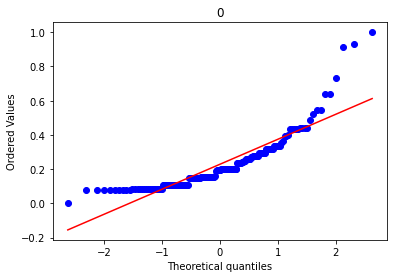

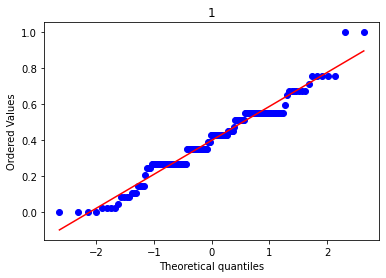

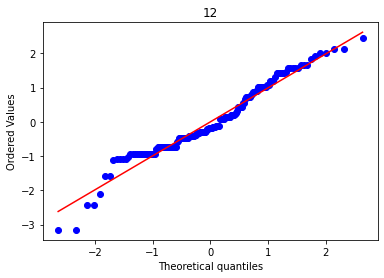

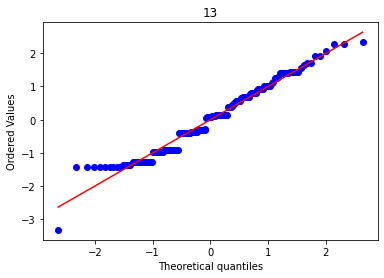

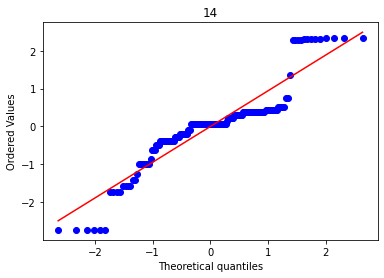

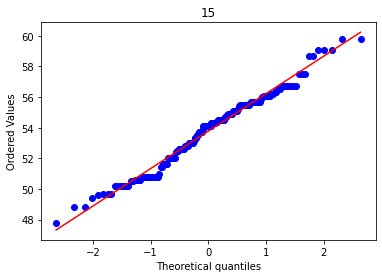

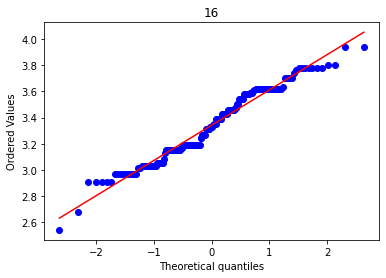

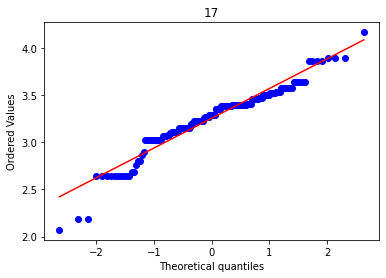

In [60]:
columns = [0,1,12,13,14,15,16,17]
for cols in columns:
    stats.probplot(dframe[cols], dist='norm', plot=plt)
    plt.title(cols)
    plt.show()